<a href="https://colab.research.google.com/github/rafaelfaustini/machinelearning-python/blob/master/hepatitis_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Tratamento de dados


### Importação dos dados usando o pandas e colocada suas labels

In [ ]:
import pandas as pd

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data'
labels = ['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites','Varices','Bilirubin','AlkPhosphate','Sgot', 'Albumin', 'Protime', 'Histology']
df = pd.read_csv(url, 
                 names=labels, header=None)
print(df.head())
df.describe()

   Class  Age  Sex Steroid  ...  Sgot Albumin Protime Histology
0      2   30    2       1  ...    18     4.0       ?         1
1      2   50    1       1  ...    42     3.5       ?         1
2      2   78    1       2  ...    32     4.0       ?         1
3      2   31    1       ?  ...    52     4.0      80         1
4      2   34    1       2  ...   200     4.0       ?         1

[5 rows x 20 columns]


,Class,Age,Sex,Antivirals,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


### Tratamento dos não preenchidos, representados com [?]



Checo os valores que não são int e sim object (strings) e crio uma lista

In [ ]:
cols = df.columns[df.dtypes.eq('object')]

Percorro cada um object e transformo em numérico, caso não seja numérico o campo fica com NaN
<br>
Assim que é preenchido com NaN eu checo se a coluna é de inteiros caso positivo, eu faço um round para inteiro da média da coluna, caso seja um float eu preencho o NaN com a média



In [ ]:

for col in cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')
  if df[col].dtypes == 'int64':
    avg = round(df[col].mean())
    df[col] = df[col].fillna(avg)
  else:
    avg = df[col].mean()
    df[col] = df[col].fillna(avg)
  print(f"Média: {avg} | {df[col].dtypes}")



Média: 1.5064935064935066 | float64
Média: 1.3506493506493507 | float64
Média: 1.603896103896104 | float64
Média: 1.7922077922077921 | float64
Média: 1.8275862068965518 | float64
Média: 1.5833333333333333 | float64
Média: 1.8 | float64
Média: 1.66 | float64
Média: 1.8666666666666667 | float64
Média: 1.88 | float64
Média: 1.4275167785234895 | float64
Média: 105.32539682539682 | float64
Média: 85.89403973509934 | float64
Média: 3.8172661870503592 | float64
Média: 61.85227272727273 | float64


In [ ]:
print(df.head())
print(df.dtypes)
df.describe()

   Class  Age  Sex   Steroid  ...   Sgot  Albumin    Protime  Histology
0      2   30    2  1.000000  ...   18.0      4.0  61.852273          1
1      2   50    1  1.000000  ...   42.0      3.5  61.852273          1
2      2   78    1  2.000000  ...   32.0      4.0  61.852273          1
3      2   31    1  1.506494  ...   52.0      4.0  80.000000          1
4      2   34    1  2.000000  ...  200.0      4.0  61.852273          1

[5 rows x 20 columns]
Class               int64
Age                 int64
Sex                 int64
Steroid           float64
Antivirals          int64
Fatigue           float64
Malaise           float64
Anorexia          float64
LiverBig          float64
LiverFirm         float64
SpleenPalpable    float64
Spiders           float64
Ascites           float64
Varices           float64
Bilirubin         float64
AlkPhosphate      float64
Sgot              float64
Albumin           float64
Protime           float64
Histology           int64
dtype: object


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,Albumin,Protime,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.800000,1.660000,1.866667,1.880000,1.427517,105.325397,85.894040,3.817266,61.852273,1.451613
std,0.406070,12.565878,0.305240,0.499958,0.362923,0.477173,0.489086,0.405727,0.366536,0.476731,0.394771,0.467516,0.335491,0.320713,1.188301,46.405585,88.478932,0.616750,17.193528,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.800000,78.000000,32.500000,3.500000,57.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,102.000000,59.000000,3.900000,61.852273,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


### Tratamento da Class que será output (y)


In [ ]:
df["Class"] = df["Class"].replace(to_replace=1, value=0)
df["Class"] = df["Class"].replace(to_replace=2, value=1)
df["Class"]

0      1
1      1
2      1
3      1
4      1
      ..
150    0
151    1
152    1
153    1
154    0
Name: Class, Length: 155, dtype: int64

### Separação dos inputs(x) e dos outputs(y)

In [ ]:
x = df.loc[:, 'Age':]
print(x)

     Age  Sex   Steroid  Antivirals  ...   Sgot  Albumin    Protime  Histology
0     30    2  1.000000           2  ...   18.0      4.0  61.852273          1
1     50    1  1.000000           2  ...   42.0      3.5  61.852273          1
2     78    1  2.000000           2  ...   32.0      4.0  61.852273          1
3     31    1  1.506494           1  ...   52.0      4.0  80.000000          1
4     34    1  2.000000           2  ...  200.0      4.0  61.852273          1
..   ...  ...       ...         ...  ...    ...      ...        ...        ...
150   46    1  2.000000           2  ...  242.0      3.3  50.000000          2
151   44    1  2.000000           2  ...  142.0      4.3  61.852273          2
152   61    1  1.000000           2  ...   20.0      4.1  61.852273          2
153   53    2  1.000000           2  ...   19.0      4.1  48.000000          2
154   43    1  2.000000           2  ...   19.0      3.1  42.000000          2

[155 rows x 19 columns]


In [ ]:
y = df.loc[:,'Class']
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
150    0
151    1
152    1
153    1
154    0
Name: Class, Length: 155, dtype: int64


## 2. Aprendizado de Máquina

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(units=10, activation= 'relu', kernel_initializer='random_uniform', input_dim = 19))
model.add(Dropout(0.25))   
model.add(Dense(units=10, activation= 'relu', kernel_initializer='random_uniform'))  
model.add(Dense(units=1, activation= 'sigmoid'))

In [ ]:
model.compile(optimizer= 'adam', loss='binary_crossentropy',
                      metrics = ['accuracy'])
h = model.fit(x, y, validation_split=0.33, batch_size=10, epochs=150, verbose=0)

## Análise dos resultados

In [ ]:
print(h.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [ ]:
import matplotlib.pyplot as plt

### Acurácia do modelo

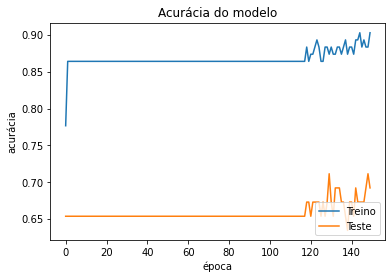

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['Treino', 'Teste'], loc='lower right')
plt.show()

## Perda do modelo

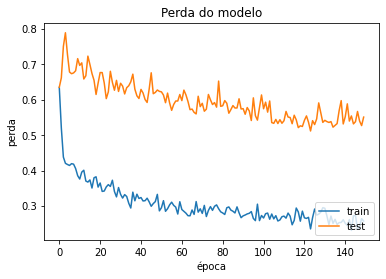

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['train', 'test'], loc='lower right')
plt.show()